In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from copy import deepcopy

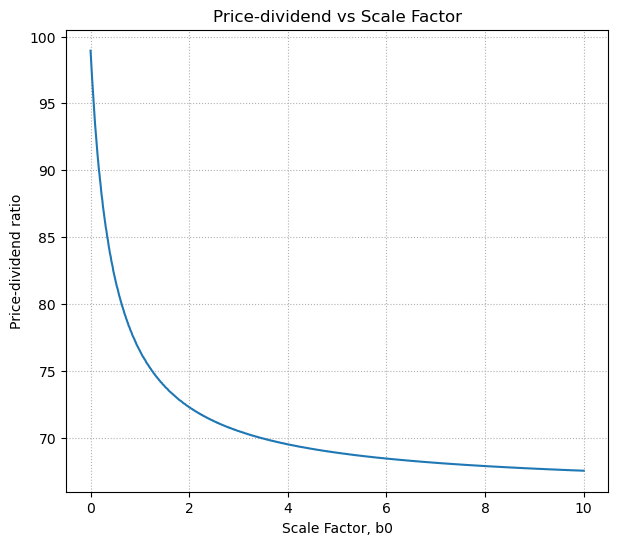

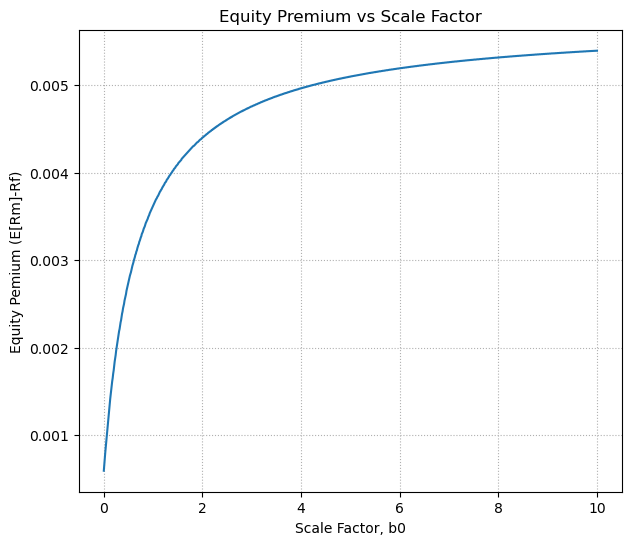

In [22]:
# empty lists to store epsilon nu and consumption growth of consumption growth
epsilon = [] #Standard normal random variable
growth= [] #Consumption Growth

#****************************************************************************************************
#Parameter Choices for the Investor's Utility Function

delta=0.99 #Subjective Discount Factor
gamma=1 #gamma>0 is coefficient of relative risk aversion for consumption shocks
lamb=2 # Loss Aversion makes investor more sensitive to shortfall in financial gain, so lambda>1
rf=1.0303 #Risk free Rate

#****************************************************************************************************
# set the number of combinations for imaginary consumnption growth
randomdraws = 10000

#Scale factor so that utility of consumption remains comparable in magnitude to utility of recent gains or losses. If set to 0, investor doesn't care.
b0=np.arange(0,10.01,0.01) 

#****************************************************************************************************
# populate the empty lists with each epsilon, nu and consumption growth
for i in range(randomdraws):
    e1 = np.random.normal(0,1)
    e2 = e1*0.02
    epsilon.append(e2)
epsilon=np.array(epsilon)

g=np.exp(0.02+epsilon) #Consumption Growth
growth.append(g)

#****************************************************************************************************
#Error Term

def ErrorTerm(b0,g,x):
    R=pd.DataFrame(x*g)
    v=pd.DataFrame(np.ones(len(g)))
    v[R>=1.0303]=R-1.0303
    v[R<1.0303]=2*(R-1.0303)
    error_x=0.99*b0*(v.mean(axis=0).values)+0.99*x-1
    return error_x

#****************************************************************************************************
#Iterative Procedure - Bisection Search
    
x_data=pd.DataFrame([],columns=['EquilibriumX','Scale Factor'])

# loop through each b0 to find the converged solution for error term (<10^-5)
# save as 'EquilibriumX' and the value of the b0 itself saved as 'Scale Factor'

for i in b0:
    x=[1.0, 1.1] #Set x-=1 & x+=1.1.
    error_x0=ErrorTerm(i,g,x[0])
    error_x1=ErrorTerm(i,g,x[1])
    while error_x0<0 and error_x1>0: #Confirm that e(x-)<0 and e(x+)>0
        x_i=0.5*(x[0]+x[1])
        error_xi=ErrorTerm(i,g,x_i)
        if abs(error_xi)<10**-5:
            x_data.loc[i,:]=[x_i,i] #test[i]=pd.Series(x_i)
            break
        elif error_xi<0:
            x[0]=deepcopy(x_i)
        else:
            x[1]=deepcopy(x_i)
    else:
         print('''EquilibriumX initialization window proximity error for 
              b0 = %0.2f. Reinitialize with new window.''' %(i))
#****************************************************************************************************
# Price-dividend ratio 

#Calculate price-divident ratio using the equilibriumX found earlier
x_data=x_data.assign(Price_Dividend=lambda x:(1/(x['EquilibriumX']-1)))

#Plot graph between Price Divident for respective b0
fig1=plt.figure(figsize=(7,6))
plt.plot(x_data['Scale Factor'].values,x_data['Price_Dividend'].values)
plt.title('Price-dividend vs Scale Factor')
plt.xlabel('Scale Factor, b0')
plt.ylabel('Price-dividend ratio')
plt.grid(True, linestyle='dotted')

#****************************************************************************************************
# Expected market return and Equity premium 

# Calculate expected market return. loop through each of the equilibriumX and multiply by g(consumption growth)
# g consist of 10000 data. The expected market return take the average for each bo value

ExpectedMktReturn=[np.average(i*g) for i in x_data['EquilibriumX'].values]

# Create data frame name Equity_premium and assign column 'Expected Market Return'
Equity_premium=pd.DataFrame(ExpectedMktReturn,columns=['Expected Market Return'])

# Assign another column name Equity_premium by substracting Expected Market Return with Rf.
Equity_premium=Equity_premium.assign(Equity_premium=lambda x:(x['Expected Market Return']-rf))

# Plot figure between equity premium and each b0 scale factor
fig2=plt.figure(figsize=(7,6))
plt.plot(x_data['Scale Factor'].values,Equity_premium['Equity_premium'].values)
plt.title('Equity Premium vs Scale Factor')
plt.xlabel('Scale Factor, b0')
plt.ylabel('Equity Pemium (E[Rm]-Rf)')
plt.grid(True, linestyle='dotted')

#****************************************************************************************************
plt.show()

In [23]:
x

[1.0148071289062501, 1.0148101806640626]

In [24]:
x_data

,EquilibriumX,Scale Factor,Price_Dividend
0.00,1.010107,0.0,98.937198
0.01,1.010181,0.01,98.22542
0.02,1.010254,0.02,97.52381
0.03,1.010315,0.03,96.946746
0.04,1.010376,0.04,96.376471
...,...,...,...
9.96,1.014807,9.96,67.535037
9.97,1.014808,9.97,67.531558
9.98,1.014809,9.98,67.528078
9.99,1.014809,9.99,67.528078


In behavioral finance, the price-dividend ratio can be interpreted in the context of investor behavior and market sentiment. Behavioral finance acknowledges that investor emotions and biases can influence financial decisions, and this can affect the way the price-dividend ratio is interpreted. Here are a few behavioral considerations:

Over-optimism and Overconfidence: When investors are overly optimistic and overconfident about a stock or market, they may be more willing to pay a higher price for the asset, leading to a higher price-dividend ratio

Investors tend to dislike losses more than they like equivalent gains. A falling price-dividend ratio may trigger loss aversion and selling pressure.

In [25]:
g

array([1.05004048, 1.00616613, 1.03540687, ..., 1.03069777, 1.03406087,
       1.01267865])

In [26]:
Equity_premium

,Expected Market Return,Equity_premium
0,1.030894,0.000594
1,1.030969,0.000669
2,1.031044,0.000744
3,1.031106,0.000806
4,1.031168,0.000868
...,...,...
996,1.035691,0.005391
997,1.035692,0.005392
998,1.035692,0.005392
999,1.035692,0.005392
